In [124]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
root_dir = '/home/mamur/TUM/MLMI/dataset/'

## STEP 1) ANALYSIS OF MASTER FILE
In this step we analysed the given csv file and deep dive into the statistics of the dataset for classification task

In [139]:
label_df = pd.read_csv(root_dir + 'mimic-cxr-2.0.0-chexpert.csv')
label_df.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


In [140]:
meta_df = pd.read_csv(root_dir + 'mimic-cxr-2.0.0-metadata.csv')
meta_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN


In [177]:
path_df = pd.read_csv(root_dir + '220112_mimic-cxr.csv')
path_df.head()

,dicom_id,study_id,subject_id,split,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,...,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,report,png_224,jpg,png_256
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,...,1.0,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/02aa804e-bde0afdd-1...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/02aa804e-bde0af...
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,...,1.0,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/174413ec-4ec4c1f7-3...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/174413ec-4ec4c1...
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/2a2277a9-b0ded155-c...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/2a2277a9-b0ded1...
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/e084de3b-be89b11e-2...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/e084de3b-be89b1...
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53911762...,/datasets/211207_mimic-cxr/68b5c4b1-227d0485-9...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,/datasets/220111_mimic-cxr_256/68b5c4b1-227d04...


In [142]:
# create a new column called patient_id -> split jpg path and get the patient id
path_df['patient_id'] = path_df['jpg'].str.split('/').str[4]

In [143]:
path_df.head()

,dicom_id,study_id,subject_id,split,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,...,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,report,png_224,jpg,png_256,patient_id
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,...,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/02aa804e-bde0afdd-1...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/02aa804e-bde0af...,p10
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,...,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/174413ec-4ec4c1f7-3...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/174413ec-4ec4c1...,p10
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/2a2277a9-b0ded155-c...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/2a2277a9-b0ded1...,p10
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/e084de3b-be89b11e-2...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/e084de3b-be89b1...,p10
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,...,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53911762...,/datasets/211207_mimic-cxr/68b5c4b1-227d0485-9...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,/datasets/220111_mimic-cxr_256/68b5c4b1-227d04...,p10


In [144]:
# count the unique values in view position
path_df['ViewPosition'].value_counts()

ViewPosition
AP                147173
PA                 96161
LATERAL            82853
LL                 35133
PA LLD                 4
LAO                    3
RAO                    3
AP AXIAL               2
AP LLD                 2
XTABLE LATERAL         2
AP RLD                 2
SWIMMERS               1
PA RLD                 1
LPO                    1
Name: count, dtype: int64

In [145]:
path_df = path_df[['dicom_id', 'jpg', "patient_id"]]

In [146]:
# Now, merge both meta_data and labels to come up with enriched dataset frame

In [147]:
merged_meta_data = pd.merge(meta_df, path_df, on='dicom_id')

In [148]:
merged_meta_data.reset_index(drop=True, inplace=True)
merged_meta_data = merged_meta_data[['dicom_id', 'study_id', 'subject_id', 'jpg', "patient_id", "ViewPosition"]]
merged_meta_data.head()

,dicom_id,study_id,subject_id,jpg,patient_id,ViewPosition
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,p10,PA
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,p10,LATERAL
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,p10,PA
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,p10,LATERAL
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,p10,AP


In [150]:
# merge the label and meta data on study_id and subject_id
merged_df = pd.merge(merged_meta_data, label_df, on=['study_id', 'subject_id'])

In [151]:
merged_df.reset_index(drop=True, inplace=True)

In [152]:
merged_df.head()

,dicom_id,study_id,subject_id,jpg,patient_id,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,p10,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,p10,LATERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,p10,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,p10,LATERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,p10,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [153]:
# get the rows with PA or AP view position
merged_df = merged_df[merged_df['ViewPosition'].isin(['PA', 'AP'])]
# Function to apply on each group
def select_ap_view(group):
    if len(group) > 1:  # Check if the group has multiple dicom_ids
        ap_view_row = group[group['ViewPosition'] == 'AP']
        return ap_view_row
    else:
        return group
# Group by subject_id and study_id, then apply the function
merged_df = merged_df.groupby(['subject_id', 'study_id']).apply(select_ap_view)
# Reset index as the grouping might have altered it
merged_df.reset_index(drop=True, inplace=True)

In [161]:
merged_df["ViewPosition"].value_counts()

ViewPosition
AP    147169
PA     75555
Name: count, dtype: int64

In [167]:
merged_df.head()["jpg"].values.tolist()

['/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg',
 '/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s53189527/2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab.jpg',
 '/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s53911762/68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714.jpg',
 '/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s53911762/fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818.jpg',
 '/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s56699142/ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c.jpg']

In [169]:
df = merged_df.copy()
# Group by dicom_id and check for unique combinations of patient_id, subject_id, and study_id
grouped = df.groupby('dicom_id').agg({'patient_id': 'nunique', 'subject_id': 'nunique', 'study_id': 'nunique'})

# Check if there are any dicom_id with more than one unique combination
duplicates = grouped[(grouped['patient_id'] > 1) | (grouped['subject_id'] > 1) | (grouped['study_id'] > 1)]

# Display results
if duplicates.empty:
    print("Each dicom_id has a unique combination of patient_id, subject_id, and study_id.")
else:
    print("There are dicom_id(s) with multiple combinations of patient_id, subject_id, and study_id.")
    print(duplicates)


Each dicom_id has a unique combination of patient_id, subject_id, and study_id.


In [170]:
# Group by patient_id, subject_id, and study_id and count unique dicom_ids
grouped = df.groupby(['patient_id', 'subject_id', 'study_id']).agg({'dicom_id': 'nunique'})

# Check if there are groups with more than one dicom_id
multiple_dicom_ids = grouped[grouped['dicom_id'] > 1]

# Display results
if multiple_dicom_ids.empty:
    print("Each combination of patient_id, subject_id, and study_id is associated with only one dicom_id.")
else:
    print("There are combinations of patient_id, subject_id, and study_id associated with multiple dicom_id(s).")
    print(multiple_dicom_ids)


There are combinations of patient_id, subject_id, and study_id associated with multiple dicom_id(s).
                                dicom_id
patient_id subject_id study_id          
p10        10000032   53911762         2
           10001884   58196907         2
           10002428   57961288         2
           10003400   50100991         2
                      52437868         3
...                                  ...
p19        19997367   56627054         2
                      57499134         2
           19997911   58692542         2
           19998843   56350227         2
           19999287   52519175         2

[13345 rows x 1 columns]


In [171]:
multiple_dicom_ids

dicom_id
patient_id subject_id study_id          
p10        10000032   53911762         2
           10001884   58196907         2
           10002428   57961288         2
           10003400   50100991         2
                      52437868         3
...                                  ...
p19        19997367   56627054         2
                      57499134         2
           19997911   58692542         2
           19998843   56350227         2
           19999287   52519175         2

[13345 rows x 1 columns]

In [180]:
# if there are multiple dicom_ids for a patient_id, subject_id, and study_id combination, then select the first dicom_id
merged_df = merged_df.groupby(['patient_id', 'subject_id', 'study_id']).apply(lambda x: x.iloc[0]).reset_index(drop=True)

In [181]:
# Group by patient_id, subject_id, and study_id and count unique dicom_ids
grouped = merged_df.groupby(['patient_id', 'subject_id', 'study_id']).agg({'dicom_id': 'nunique'})

# Check if there are groups with more than one dicom_id
multiple_dicom_ids = grouped[grouped['dicom_id'] > 1]

# Display results
if multiple_dicom_ids.empty:
    print("Each combination of patient_id, subject_id, and study_id is associated with only one dicom_id.")
else:
    print("There are combinations of patient_id, subject_id, and study_id associated with multiple dicom_id(s).")
    print(multiple_dicom_ids)


Each combination of patient_id, subject_id, and study_id is associated with only one dicom_id.


In [182]:
print("Number of unique dicom_ids: {}".format(merged_df['dicom_id'].nunique()))

Number of unique dicom_ids: 208131


In [185]:
merged_df.head()

,dicom_id,study_id,subject_id,jpg,patient_id,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,p10,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,p10,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,p10,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5669...,p10,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,57375967,10000764,/mimic-cxr-jpg/2.0.0/files/p10/p10000764/s5737...,p10,AP,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


In [186]:
# return all the unique values in pathology columns columns[4:]
pathology_columns = merged_df.columns[6:]
pathology_columns


Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices'],
      dtype='object')

In [187]:
# return the count number of unique values in each pathology column
for column in pathology_columns:
    print(column, merged_df[column].value_counts())

Atelectasis Atelectasis
 1.0    43282
-1.0     9702
 0.0     1400
Name: count, dtype: int64
Cardiomegaly Cardiomegaly
 1.0    41993
 0.0    14103
-1.0     5668
Name: count, dtype: int64
Consolidation Consolidation
 1.0    10133
 0.0     7316
-1.0     4037
Name: count, dtype: int64
Edema Edema
 1.0    26080
 0.0    22646
-1.0    12626
Name: count, dtype: int64
Enlarged Cardiomediastinum Enlarged Cardiomediastinum
-1.0    8835
 1.0    6725
 0.0    4642
Name: count, dtype: int64
Fracture Fracture
 1.0    3972
 0.0     793
-1.0     513
Name: count, dtype: int64
Lung Lesion Lung Lesion
 1.0    5589
-1.0     990
 0.0     696
Name: count, dtype: int64
Lung Opacity Lung Opacity
 1.0    48097
-1.0     3512
 0.0     2630
Name: count, dtype: int64
No Finding No Finding
1.0    66953
Name: count, dtype: int64
Pleural Effusion Pleural Effusion
 1.0    51096
 0.0    23910
-1.0     5499
Name: count, dtype: int64
Pleural Other Pleural Other
 1.0    1780
-1.0     675
 0.0     105
Name: count, dtype: int

In [188]:
# count NaN values in each pathology column
for column in pathology_columns:
    print(column, merged_df[column].isna().sum())

Atelectasis 153747
Cardiomegaly 146367
Consolidation 186645
Edema 146779
Enlarged Cardiomediastinum 187929
Fracture 202853
Lung Lesion 200856
Lung Opacity 153892
No Finding 141178
Pleural Effusion 127626
Pleural Other 205571
Pneumonia 155555
Pneumothorax 157325
Support Devices 140633


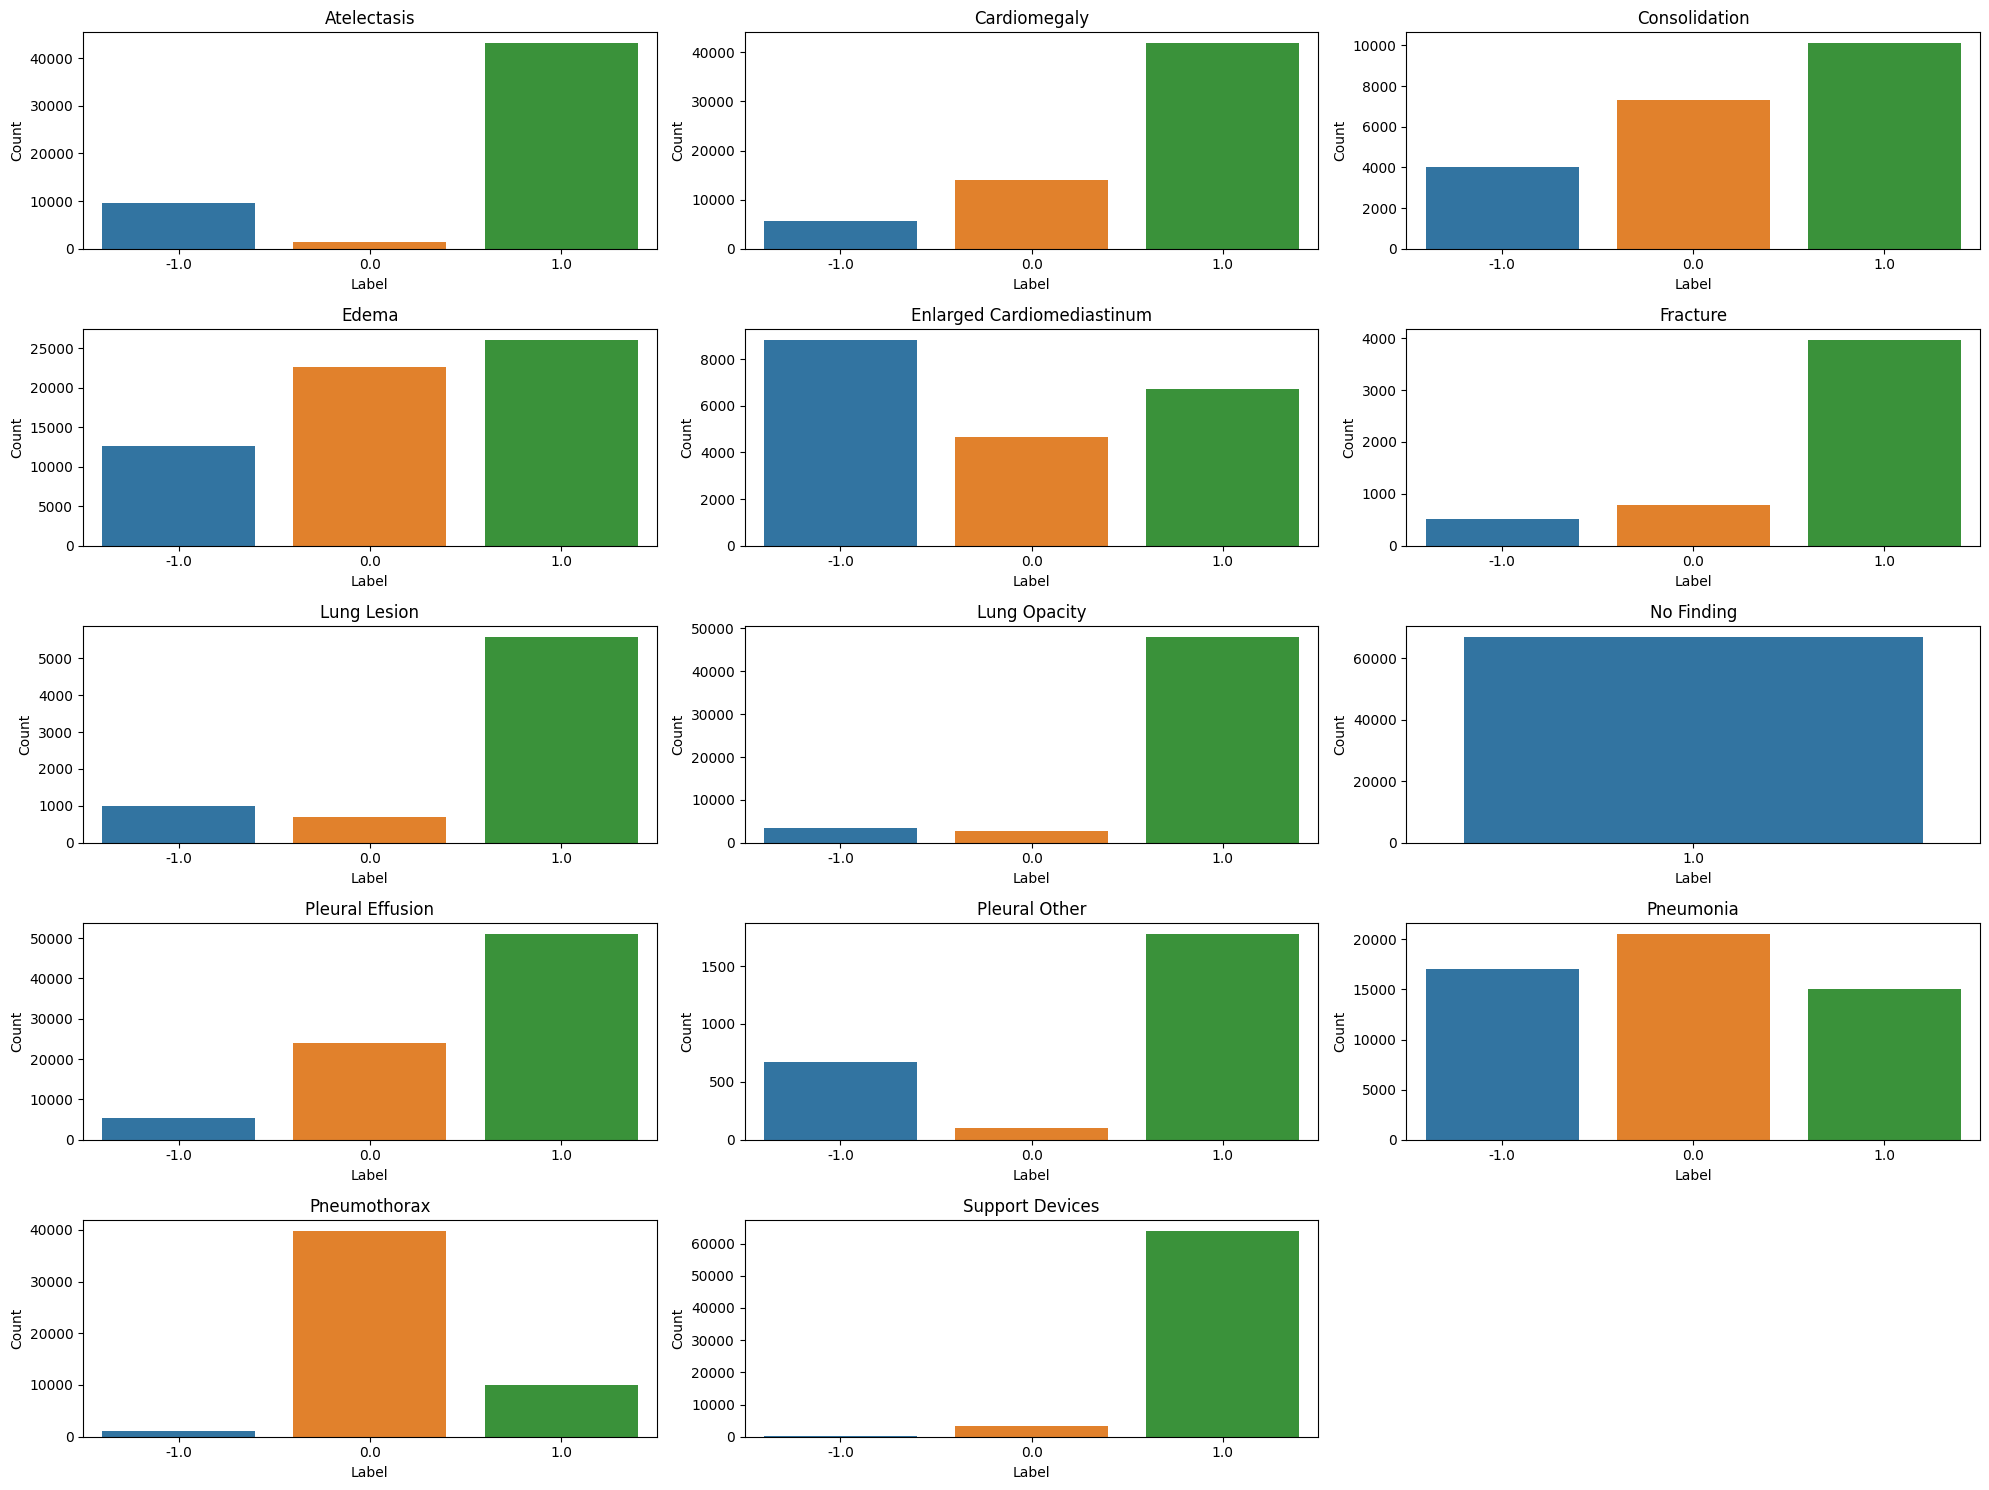

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = merged_df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [190]:
# fill all NAN values with 0
# merged_df.fillna(0, inplace=True)

In [191]:
df = merged_df.copy()

In [192]:
df.columns

Index(['dicom_id', 'study_id', 'subject_id', 'jpg', 'patient_id',
       'ViewPosition', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices'],
      dtype='object')

In [193]:
# fill all NaN values with 0
df.fillna(0, inplace=True)

In [194]:
df_ones = df.copy()
# replace all -1 with 1
df_ones.replace(-1, 1, inplace=True)

In [195]:
df_zeros = df.copy()
# replace all -1 with 0
df_zeros.replace(-1, 0, inplace=True)

In [196]:
df.to_csv(root_dir + 'master_df.csv', index=False)

In [197]:
df_ones.to_csv(root_dir + 'master_df_ones.csv', index=False)

In [198]:
df_zeros.to_csv(root_dir + 'master_df_zeros.csv', index=False)

## Fill with Ones

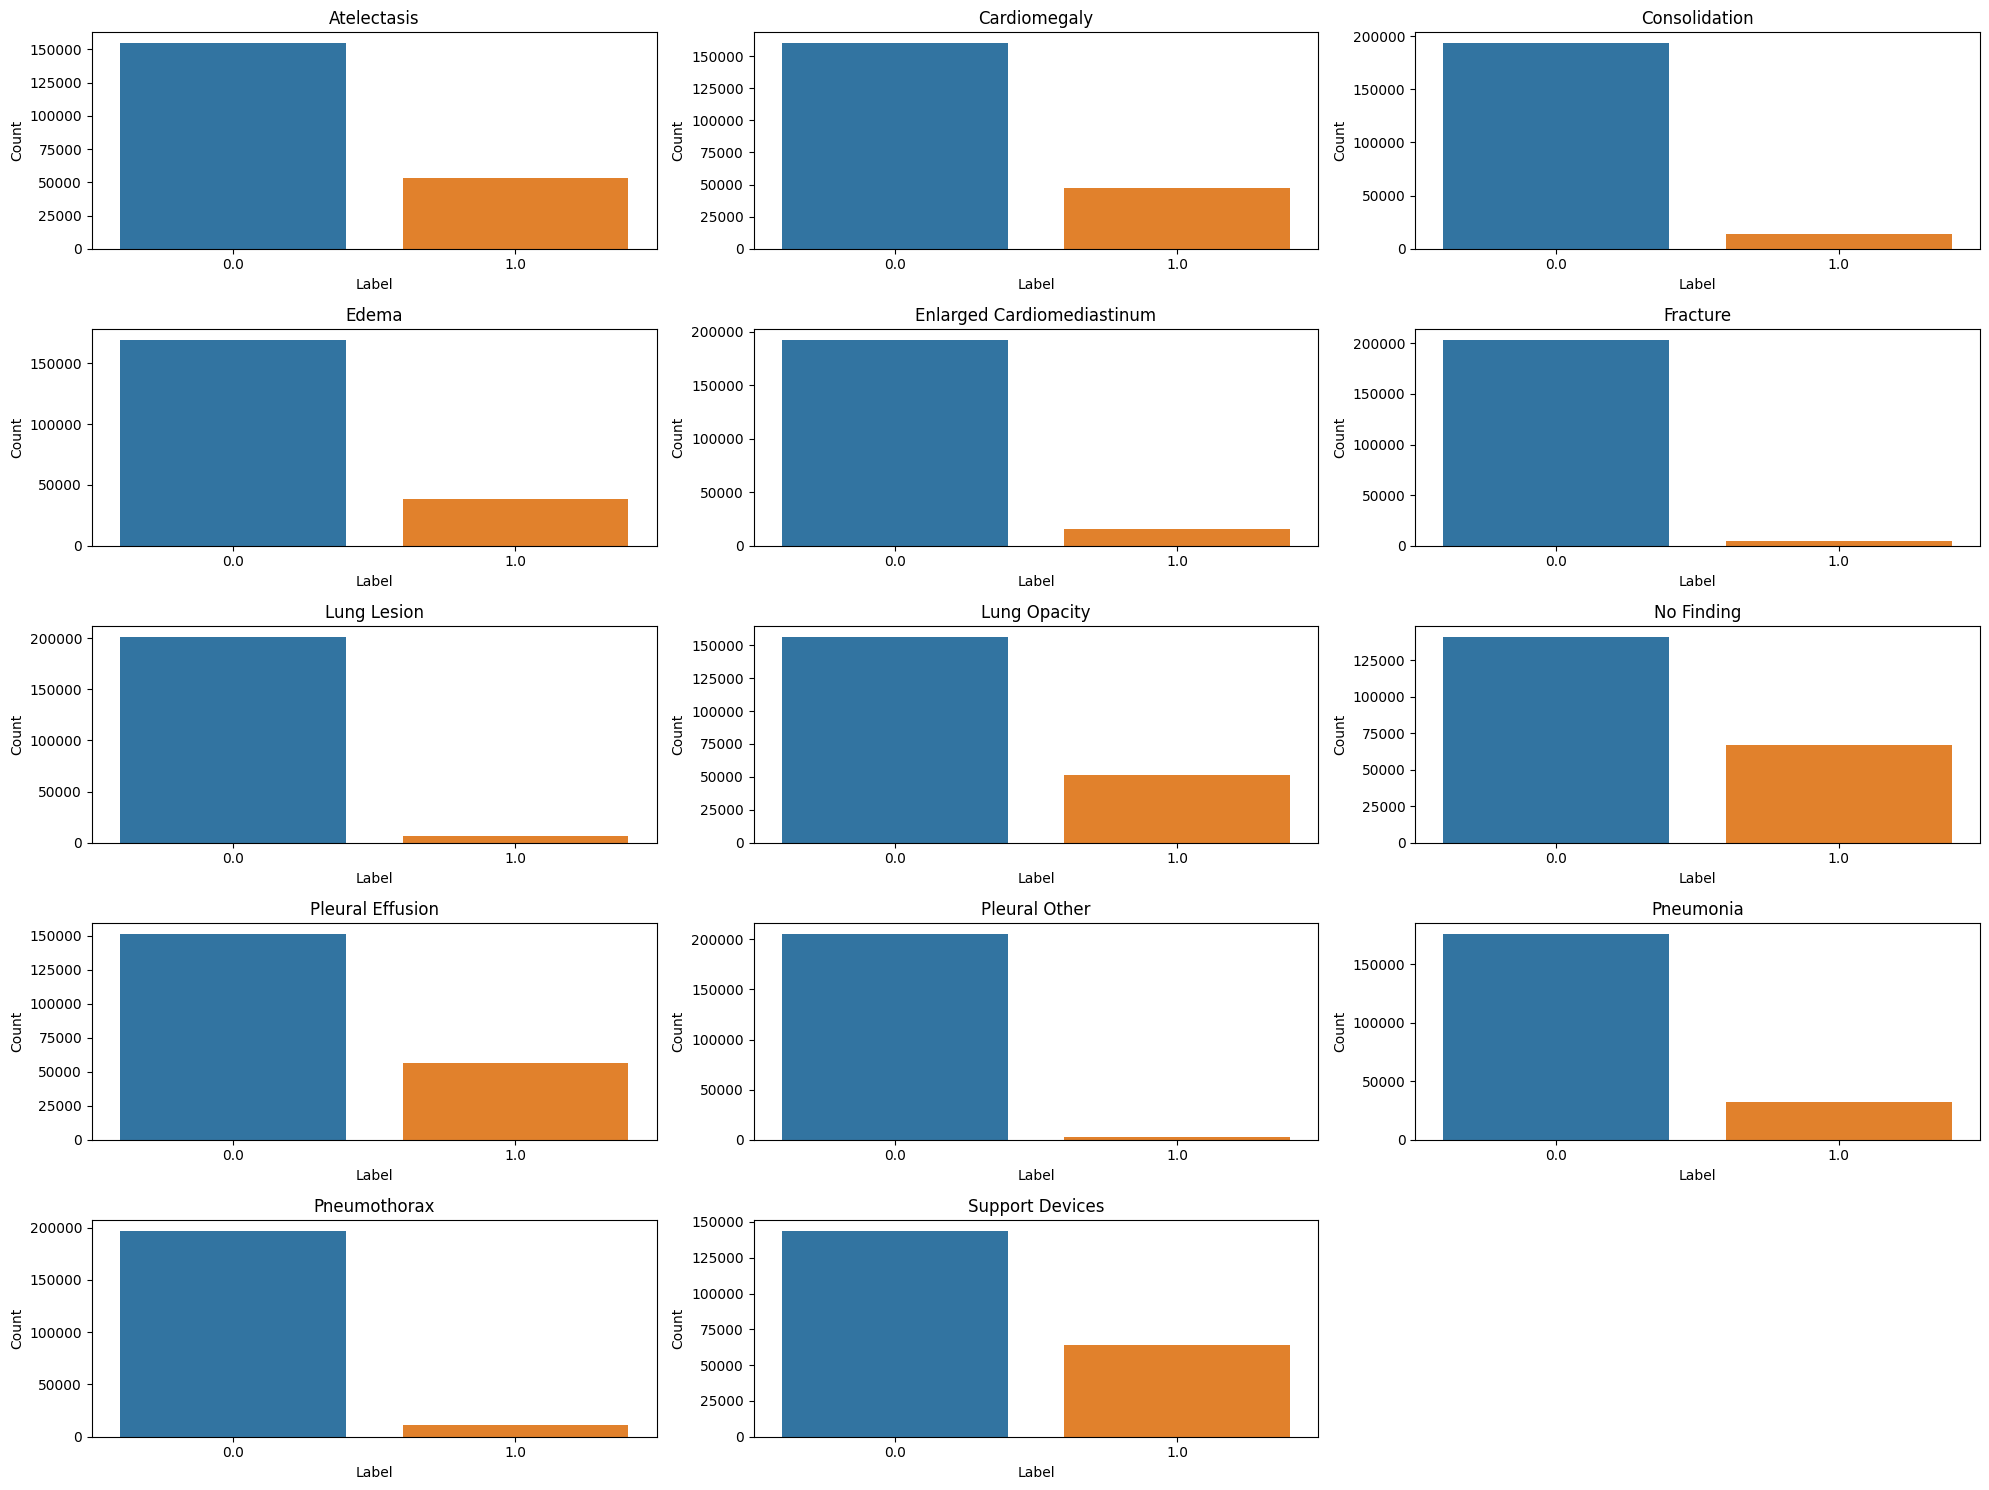

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = df_ones[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Fill with Zeros

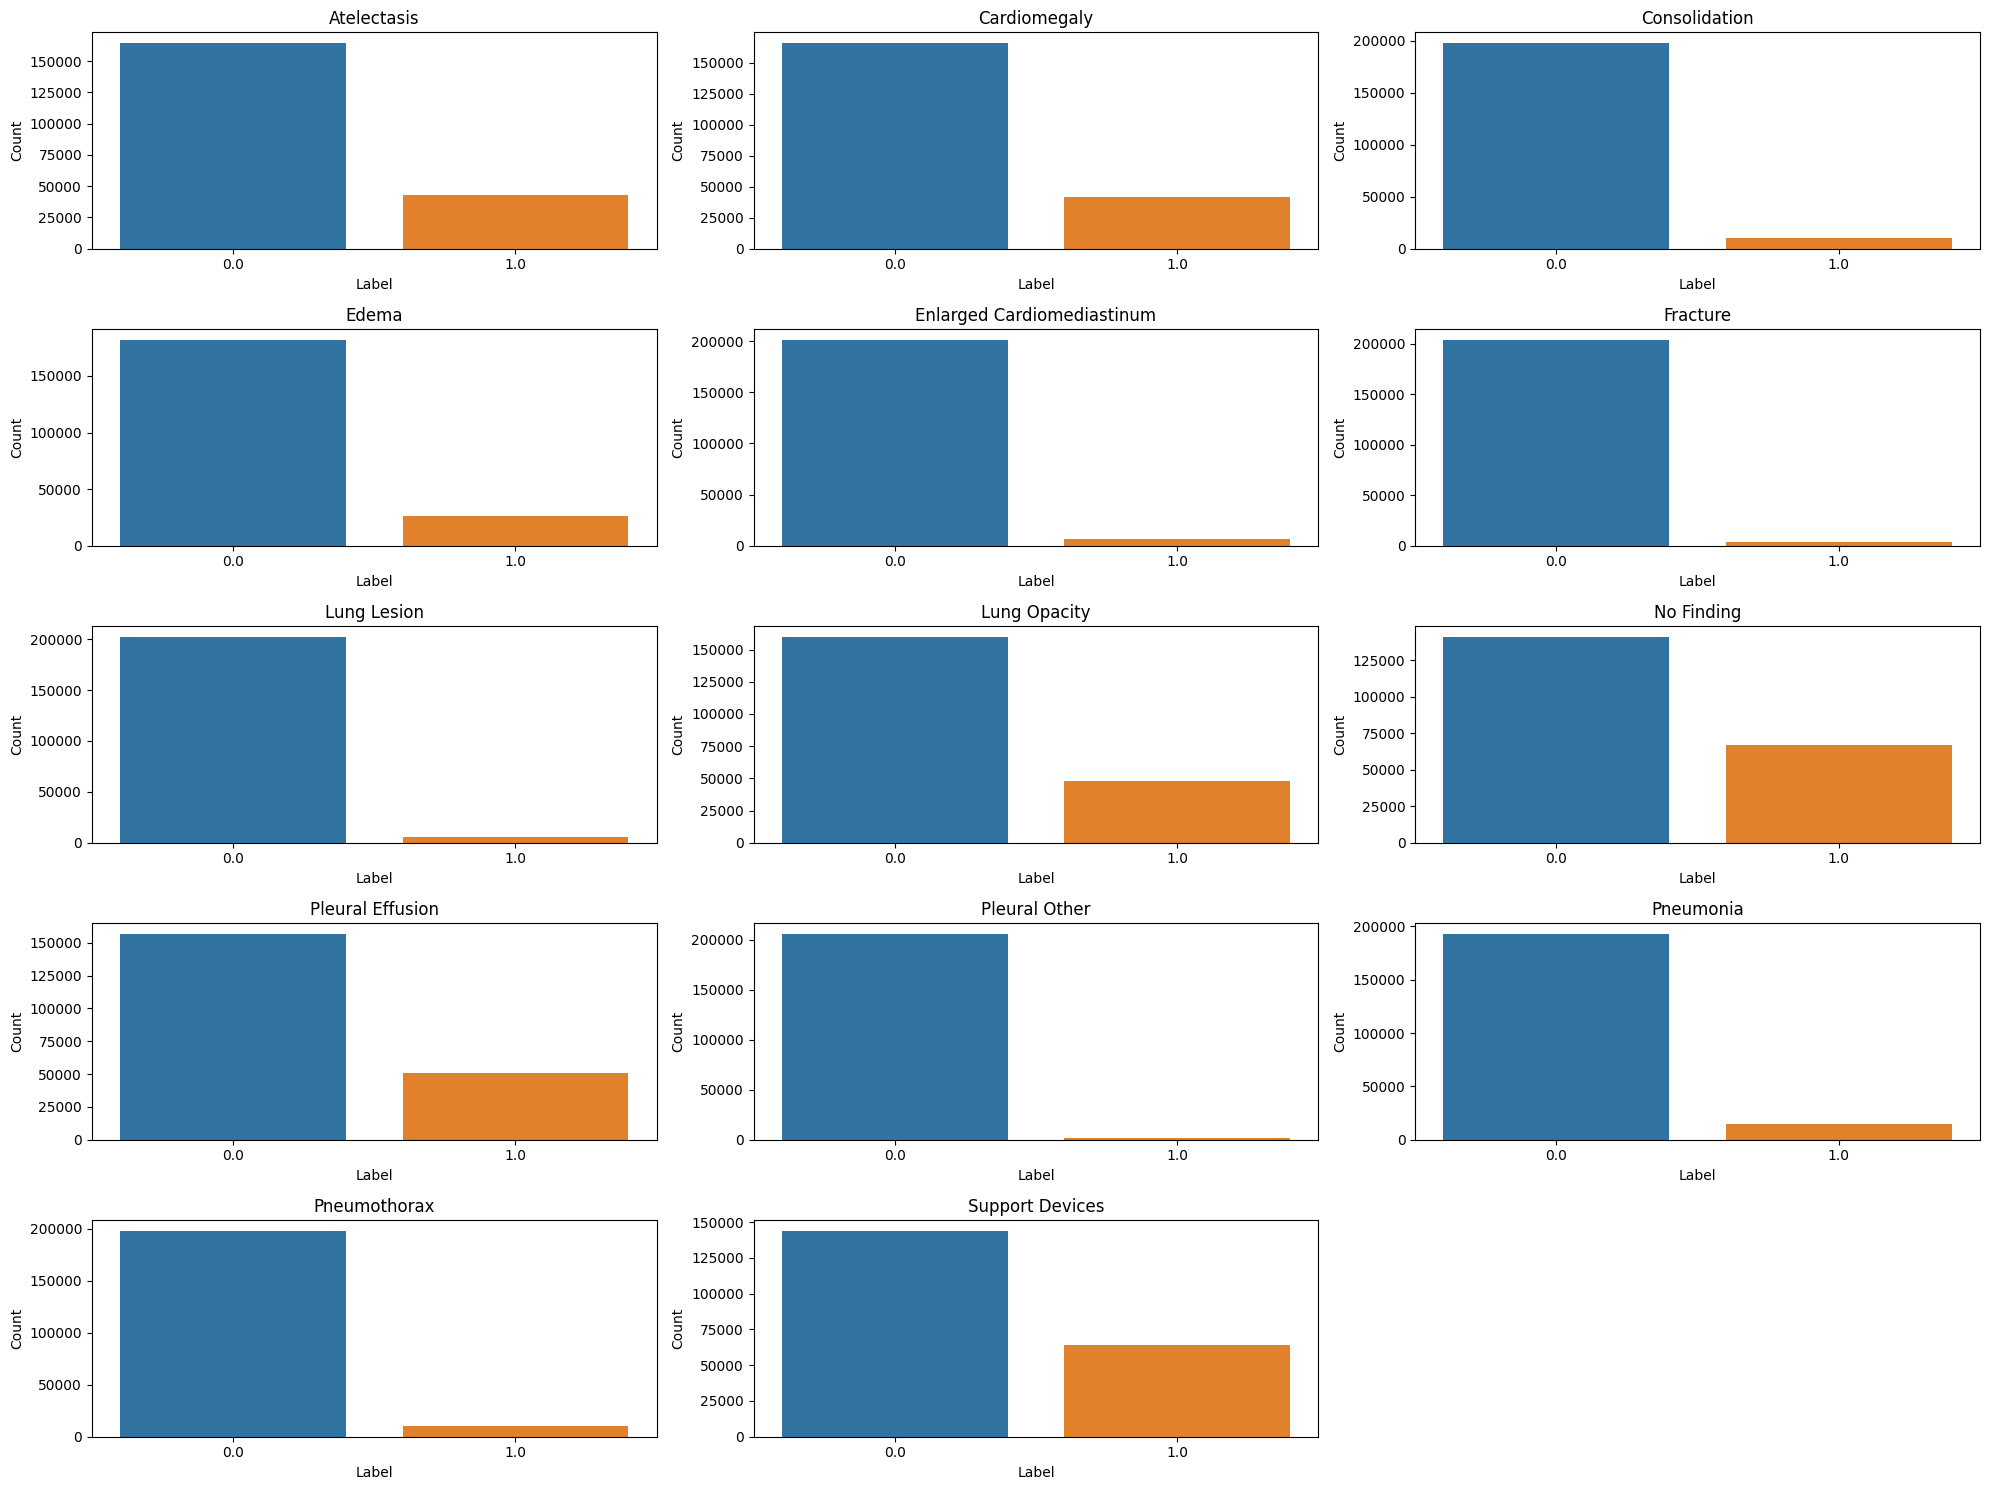

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = df_zeros[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Testing Dataset Class

In [202]:
import sys
sys.path.append("../")
from src.utils.utils import read_config

In [203]:
from src.utils.environment_settings import env_settings
opt = read_config(env_settings.CONFIG)

In [204]:
from src.utils._prepare_data import DataHandler

In [205]:
processor = DataHandler(opt["dataset"])

In [206]:
records = processor.create_records()

In [207]:
records[0]

{'img': '/mimic-cxr-jpg/2.0.0/files/p14/p14766138/s59551408/f7a23990-5e6af428-268ba52f-20de694f-52b696e0.jpg',
 'label': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])}